In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'pdf'

In [2]:
log_files = [
    '../checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line84_dfq.txt',
    '../checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line76_dfq.txt',
    '../checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line77_dfq.txt',  '../checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line82_dfq.txt']

In [3]:
def get_res_dict(file):
    f = open(file).readlines()
    res_dict = {}
    for logs in f:
        lines = logs.strip()
    #     print(lines.split(' ')[3])
        if lines.split(' ')[4] == '[Eval]':
            epoch = int(lines.split(' ')[5].split('=')[-1])
            acc = float(lines.split(' ')[6].split('=')[-1])
            res_dict[epoch] = acc
    return res_dict

In [4]:
import numpy as np
import pandas as pd
res_dicts_currkd = []
dfs = []
for f in log_files:
    res_dict = get_res_dict(f)
    real_res_dict = {'epoch': list(res_dict.keys())[:-3], 'acc': list(res_dict.values())[:-3], 'method': ['CuDFKD' for _ in range(len(res_dict))][:-3]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs.append(dfa)
    values = list(res_dict.values())
    res_dicts_currkd.append(np.array(values))
#     epochs.append()
df_currkd = pd.concat(dfs)
df_currkd.head()
# all_res = np.array(res_dicts)    

,epoch,acc,method
0,0,32.13,CuDFKD
1,1,51.28,CuDFKD
2,2,71.24,CuDFKD
3,3,78.62,CuDFKD
4,4,80.68,CuDFKD


In [5]:
# print(all_res)
res = []
for i in range(245):
    acc = df_currkd[df_currkd['epoch'] == i]['acc']
    res.append(acc.to_numpy())

means = [np.mean(x) for x in res]
vars = [np.var(x) for x in res]
means = np.asarray(means)
real_mean = np.mean(means[80:])
real_var = np.var(means[80:])
print(real_mean, real_var)
# print(res[0])
# print(all_res[0])
# print(np.mean(all_res[0]))
# eacc_ts = all_res.mean(axis=0)
# eacc_ts_var = all_res.var(axis=0)
# x = np.argmax(eacc_ts[-:] - eacc_ts_var[-3:])
# print(eacc_ts[-3:][x], eacc_ts_var[-3:][x])

94.2514393939394 0.31669031450872254


In [6]:
res_dict = get_res_dict('../checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-deepinv.txt')
w = np.asarray(list(res_dict.values())[80:])
print(np.mean(w), np.var(w))

87.16870588235294 13.857617148788929


In [7]:
import pandas as pd
file_lists = [
    '/data/lijingru/DataFree/checkpoints/datafree-cmi/log-cifar10-resnet34-resnet18-cmi.txt', 
    '../checkpoints/datafree-dafl/log-cifar10-resnet34-resnet18.txt',
    '../checkpoints/datafree-deepinv/log-cifar10-resnet34-resnet18-deepinv.txt'
]
methods = ['CMI', 'DAFL', 'AdaDFKD']
# currkd_res = all_res[0]
res_dicts = dfs
for f, m in zip(file_lists, methods):
    res_dict = get_res_dict(f)
    real_res_dict = {'epoch': list(res_dict.keys())[:-3], 'acc': list(res_dict.values())[:-3], 'method': [m for _ in range(len(res_dict))][:-3]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs.append(dfa)
    values = list(res_dict.values())
    print(len(values))

all_dfs = pd.concat(dfs)
all_dfs.head()

250


FileNotFoundError: [Errno 2] No such file or directory: '../checkpoints/datafree-dafl/log-cifar10-resnet34-resnet18.txt'

In [7]:
# print(res_dicts)
columns=['CurrDFKD', 'CMI', 'DAFL', 'ADI']
res_dict = {}
for c, v in zip(columns, res_dicts):
    res_dict[c] = v
w = pd.DataFrame(data=dict([(k, pd.Series(v)) for k, v in res_dict.items()]))
w.head()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0, 0.5, 'top1-acc(%)')

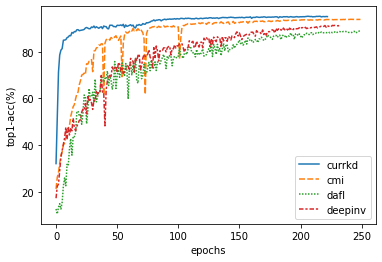

In [32]:
import matplotlib.pyplot as plt

sns.lineplot(data=w)
plt.xlabel('epochs')
plt.ylabel('top1-acc(%)')

In [8]:
fig = sns.lineplot(data=all_dfs, x='epoch', y='acc', hue='method')
x_ticks = np.arange(0, 251, 50)
y_ticks = np.arange(0, 101, 20)
fig.set_xlim(0, 255)
fig.set_ylim(0, 100)
fig.set_xlabel('epoch', fontsize=14)
fig.set_ylabel('Accuracy', fontsize=14)
fig.set_xticklabels(x_ticks, fontsize=12)
fig.set_yticklabels(y_ticks, fontsize=12)
plt.savefig('cifar10.pdf')

NameError: name 'all_dfs' is not defined

In [10]:
print(np.mean(a), np.var(a))
s = np.array([92.57772,91.22188,91.10260])
print(np.mean(s), np.var(s))

NameError: name 'a' is not defined

In [10]:
log_files = [
    '../checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line8.txt',
    '../checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line16.txt',
    '../checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line17.txt',
    '../checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line20.txt'
]
methods = ['CMI', 'DAFL', 'ADI']
res_dicts = []
dfs_hun = []
for f, m in zip(log_files, methods):
    res_dict = get_res_dict(f)
    real_res_dict = {'epoch': list(res_dict.keys())[:-50], 'acc': list(res_dict.values())[:-50], 'method': ['CuDFKD' for _ in range(len(res_dict))][:-50]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs_hun.append(dfa)
    values = list(res_dict.values())
    print(len(values))

df_currkd_hundred = pd.concat(dfs_hun)
df_currkd_hundred.head()

!cat /data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line20.txt

300
300
300
[05/09 09:58:49] cifar100-resnet34-resnet18 INFO: method: probkd
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: adv: 0.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: adv_type: kl
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: cond: False
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: bn: 1.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: oh: 1.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: act: 0.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: l1: 0.01
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: balance: 0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: depth: 2
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: no_feature: True
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: only_feature: False
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: save_dir: run/probkd_test
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: no_logits: 1
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: logit_correction: mean
[05/09 09:58:50] cifar100-resnet34-r

In [11]:
res = []
for i in range(300):
    acc = df_currkd_hundred[df_currkd_hundred['epoch'] == i]['acc']
    res.append(acc.to_numpy())

means = [np.mean(x) for x in res]
vars = [np.var(x) for x in res]
# print(means, vars)
# means = np.asarray(means)
real_mean = np.mean(means[80:])
real_var = np.var(means[80:])
print(real_mean, real_var)

nan nan


/data/lijingru/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/lijingru/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/lijingru/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/lijingru/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/data/lijingru/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
file_lists = [
    '../checkpoints/datafree-cmi/log-cifar100-resnet34-resnet18-cmi.txt',
    '../checkpoints/datafree-dafl/log-cifar100-resnet34-resnet18.txt',
    '../checkpoints/datafree-deepinv/log-cifar100-resnet34-resnet18-deepinv.txt'
]

methods = ['CMI', 'DAFL', 'ADI']
# currkd_res = all_res[0]
for f, m in zip(file_lists, methods):
    res_dict = get_res_dict(f)
    k = 50 if m !='ADI' else 2
    real_res_dict = {'epoch': list(res_dict.keys())[:-k], 'acc': list(res_dict.values())[:-k], 'method': [m for _ in range(len(res_dict))][:-k]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs_hun.append(dfa)
    values = list(res_dict.values())
    print(len(values))

all_dfs = pd.concat(dfs_hun)
all_dfs.head()
# print(all_dfs[all_dfs['method'] == 'adi'])

300
300
252


,epoch,acc,method
0,0,2.56,CuDFKD
1,1,8.10,CuDFKD
2,2,12.75,CuDFKD
3,3,17.61,CuDFKD
4,4,22.89,CuDFKD


In [13]:
# sns.lineplot(data=df_currkd_hundred, x='epoch', y='acc', hue='method')
fig = sns.lineplot(data=all_dfs, x='epoch', y='acc', hue='method')
x_ticks = np.arange(0, 250, 50)
y_ticks = np.arange(0, 80, 10)
fig.set_xlim(0, 255)
fig.set_ylim(0, 80)
fig.set_xlabel('epoch', fontsize=14)
fig.set_ylabel('Accuracy', fontsize=14)
fig.set_xticklabels(x_ticks, fontsize=12)
fig.set_yticklabels(y_ticks, fontsize=12)
plt.savefig('cifar100.pdf')

<ipython-input-13-33ae041b5da1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(x_ticks, fontsize=12)
<ipython-input-13-33ae041b5da1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(y_ticks, fontsize=12)


<Figure size 432x288 with 1 Axes>

In [14]:
res_dict = get_res_dict('../checkpoints/datafree-deepinv/log-cifar100-resnet34-resnet18-deepinv.txt')
w = np.asarray(list(res_dict.values())[130:-4])
print(np.mean(w), np.var(w))

56.34415254237288 18.230766654696932


Main result for noisy teacher

In [9]:
res_dict = {
    'method': ['teacher', 'teacher', 'currkd', 'currkd', 'cmi', 'cmi', 'dafl', 'dafl', 'deepinv', 'deepinv'],
    'acc': [95.70, 94.07, 95.02, 93.34, 94.84, 92.36, 92.22, 88.86, 93.26, 88.95],
    'type': ['clean', 'noisy', 'clean', 'noisy','clean', 'noisy','clean', 'noisy','clean', 'noisy'],
}

noisy_df = pd.DataFrame(data=res_dict)
noisy_df

,method,acc,type
0,teacher,95.70,clean
1,teacher,94.07,noisy
2,currkd,95.02,clean
3,currkd,93.34,noisy
4,cmi,94.84,clean
5,cmi,92.36,noisy
6,dafl,92.22,clean
7,dafl,88.86,noisy
8,deepinv,93.26,clean
9,deepinv,88.95,noisy


In [10]:
fig = sns.barplot(data=noisy_df, x='method', y='acc', hue='type')
fig.set_ylim(88, 96)
y_ticks = np.arange(88, 96, 1)
fig.set_xticklabels(['Teacher', 'CuDFKD', 'CMI', 'DAFL', 'ADI'],  fontsize=12)
fig.set_yticklabels(y_ticks,  fontsize=12)
fig.set_xlabel('DFKD method', fontsize=14)
fig.set_ylabel('Top1 accuracy', fontsize=14)
plt.savefig('noisy.pdf')

<ipython-input-10-9bf82cb678f0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(y_ticks,  fontsize=12)


<Figure size 432x288 with 1 Axes>

In [13]:
curriculum_dict={
    'method': ['teacher', 'None', 'hard', 'soft', 'log','teacher', 'None', 'hard', 'soft', 'log','teacher', 'None', 'hard', 'soft', 'log'],
    'accuracy': [95.70, 93.24, 94.97, 95.01, 95.28, 100.00, 94.00, 97.71, 97.74, 98.13, 1.0000, 0.8202, 0.8813, 0.8786, 0.8909],
    'metric': ['Acc@1','Acc@1','Acc@1','Acc@1','Acc@1','Agree@1','Agree@1','Agree@1','Agree@1','Agree@1','prob loyalty','prob loyalty','prob loyalty','prob loyalty','prob loyalty']
}
curr_df = pd.DataFrame(curriculum_dict)
curr_df

,method,accuracy,metric
0,teacher,95.7000,Acc@1
1,None,93.2400,Acc@1
2,hard,94.9700,Acc@1
3,soft,95.0100,Acc@1
4,log,95.2800,Acc@1
5,teacher,100.0000,Agree@1
6,None,94.0000,Agree@1
7,hard,97.7100,Agree@1
8,soft,97.7400,Agree@1
9,log,98.1300,Agree@1


In [16]:
fig = sns.barplot(data=curr_df, x='method', y='accuracy', hue='metric')
x_ticks = curriculum_dict['method'][:5]
# y_ticks = [94.5, 94.3, 94.6, 94.9, 95.2, 95.5, 95.8, 96.1]
y_ticks = np.arange(80, 100, 5)
fig.set_ylim(80, 100)
fig.set_xlabel('Curriculum Strategy', fontsize=14)
fig.set_ylabel('Accuracy', fontsize=14)
fig.set_xticklabels(x_ticks, fontsize=12)
fig.set_yticklabels(y_ticks, fontsize=12)
plt.savefig('strategy.pdf')

<ipython-input-16-3ac061a77e20>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(y_ticks, fontsize=12)


<Figure size 432x288 with 1 Axes>

In [19]:
lambda_0_dict = {
    'lambda_0': [2, 2.2, 2.5, 2.8],
    'accuracy': [93.34,93.24,93.17,93.10],
    'curriculum': ['logarithm', 'logarithm', 'logarithm', 'logarithm']
}

lambda_df = pd.DataFrame(data=lambda_0_dict)
lambda_df

,lambda_0,accuracy,curriculum
0,2.0,93.34,logarithm
1,2.2,93.24,logarithm
2,2.5,93.17,logarithm
3,2.8,93.10,logarithm


In [20]:
import matplotlib.pyplot as plt
plt.plot(lambda_0_dict['lambda_0'], lambda_0_dict['accuracy'], '-ro')
plt.ylim(93, 93.4)
x_ticks = np.arange(2, 3, 0.2)
y_ticks = np.arange(93, 93.4, 0.1)
plt.xlabel('lambda_0', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)
plt.savefig('lambda_0.pdf')

<Figure size 432x288 with 1 Axes>

In [5]:
res_dict_below = {
    'method': ['teacher', 'teacher', 'currkd', 'currkd', 'cmi', 'cmi', 'dafl', 'dafl', 'deepinv', 'deepinv'],
    'acc': [94.87, 93.82, 86.22, 87.44, 90.01, 82.69,72.14 , 67.22, 83.04, 78.56],
    'type': ['clean', 'noisy', 'clean', 'noisy','clean', 'noisy','clean', 'noisy','clean', 'noisy'],
}

noisy_df = pd.DataFrame(data=res_dict_below)
noisy_df

,method,acc,type
0,teacher,94.87,clean
1,teacher,93.82,noisy
2,currkd,86.22,clean
3,currkd,87.44,noisy
4,cmi,90.01,clean
5,cmi,82.69,noisy
6,dafl,72.14,clean
7,dafl,67.22,noisy
8,deepinv,83.04,clean
9,deepinv,78.56,noisy


In [6]:
fig = sns.barplot(data=noisy_df, x='method', y='acc', hue='type')
fig.set_ylim(65, 95)
y_ticks = np.arange(65, 95, 5)
fig.set_xticklabels(['Teacher', 'CuDFKD', 'CMI', 'DAFL', 'ADI'],  fontsize=12)
fig.set_yticklabels(y_ticks,  fontsize=12)
fig.set_xlabel('DFKD method', fontsize=14)
fig.set_ylabel('Top1 accuracy', fontsize=14)
plt.savefig('noisy_wrn.pdf')

<ipython-input-6-0f53a40e4d69>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(y_ticks,  fontsize=12)


<Figure size 432x288 with 1 Axes>

In [21]:
grad_adv_dict = {
    'begin': [0.17, 0.17, 0.20, 0.20, 0.25],
    'end': [0.67, 0.75, 0.67, 0.75, 0.67],
    'accuracy':[70.30, 70.15, 70.46, 70.58, 70.44],
}

grad_adv_df = pd.DataFrame(grad_adv_dict)
grad_adv_df

,begin,end,accuracy
0,0.17,0.67,70.30
1,0.17,0.75,70.15
2,0.20,0.67,70.46
3,0.20,0.75,70.58
4,0.25,0.67,70.44


In [7]:
T_dict = {
    'T': [4, 5, 8, 10, 12, 15, 18, 20],
    'accuracy': [94.96, 95.01,94.94,94.93,94.97, 95.03, 94.94, 95.21],
}

import matplotlib.pyplot as plt
plt.plot(T_dict['T'], T_dict['accuracy'], '-ro')
plt.ylim(94.5, 95.5)
x_ticks = np.arange(0, 24, 4)
y_ticks = np.arange(94.5, 95.5, 0.2)
plt.xlabel('T', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)
plt.savefig('T.pdf')

<Figure size 432x288 with 1 Axes>

In [39]:
b = np.array(list(res_dict_cifar100.values()))
print(np.mean(b))

68.8198


In [24]:
import pandas as pd
datas = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in res_dict.items()]))
datas.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,27.68,51.5,69.62,76.56,79.06,83.16,82.97,85.35,84.97,86.05,...,95.03,95.05,95.0,94.99,95.01,94.99,95.01,90.59,71.57,43.06
